# Sanity Checks

Rn, I'm just checking Francesco's new Z' sample to make sure that it has everything that I need.

In [1]:
import uproot

In [ ]:
#fname = "../../../FlavourTagPerformanceFramework/run/flav_Akt4EMTo.root"
#fname = "../../../public/FrancescoNtuples/mc16d_PFlow_hybrid_5TeV/Pflow_EXTTENDED_noBug_4RNN_29109_correct.root"

In [23]:
# fname = "../../../public/FrancescoNtuples/mc16d_VR_hybrid_1.5TeV/"
# fname += "VR_Track_noBug_4RNN_18219_correct_lowerStat.root"

fname = "../../../public/user.bdong.mc16_13TeV.427080.flatpT_Zprime.mc16d_newDerivation_noRetag_rerun_AktVR30Rmax4Rmin02Tr/user.bdong.16288899.AktVR30Rmax4Rmin02Tr._000002.root"


#jetCollectionName = "VR30Rmax4Rmin02Track"
myTree = uproot.open(fname)["bTag_AntiKtVR30Rmax4Rmin02TrackJets"]
for k in myTree.keys():
    #if 'ip3d' in k.decode():
        print(k)

b'runnb'
b'eventnb'
b'mcchan'
b'mcwg'
b'avgmu'
b'actmu'
b'PVx'
b'PVy'
b'PVz'
b'truth_PVx'
b'truth_PVy'
b'truth_PVz'
b'njets'
b'jet_pt'
b'jet_eta'
b'jet_phi'
b'jet_E'
b'jet_pt_orig'
b'jet_eta_orig'
b'jet_phi_orig'
b'jet_E_orig'
b'jet_LabDr_HadF'
b'jet_DoubleHadLabel'
b'jet_JVT'
b'jet_m'
b'jet_nConst'
b'jet_dRiso'
b'jet_truthMatch'
b'jet_isPU'
b'jet_aliveAfterOR'
b'jet_aliveAfterORmu'
b'jet_isBadMedium'
b'jet_truthPt'
b'jet_dRminToB'
b'jet_dRminToC'
b'jet_dRminToT'
b'jet_dl1_pb'
b'jet_dl1_pc'
b'jet_dl1_pu'
b'jet_dl1r_pb'
b'jet_dl1r_pc'
b'jet_dl1r_pu'
b'jet_dl1rmu_pb'
b'jet_dl1rmu_pc'
b'jet_dl1rmu_pu'
b'jet_mv2c10'
b'jet_mv2r'
b'jet_mv2rmu'
b'jet_mv2c100'
b'jet_mv2cl100'
b'jet_ip2d_pb'
b'jet_ip2d_pc'
b'jet_ip2d_pu'
b'jet_ip2d_llr'
b'jet_ip3d_pb'
b'jet_ip3d_pc'
b'jet_ip3d_pu'
b'jet_ip3d_llr'
b'jet_ip2'
b'jet_ip2_c'
b'jet_ip2_cu'
b'jet_ip2_nan'
b'jet_ip2_c_nan'
b'jet_ip2_cu_nan'
b'jet_ip3'
b'jet_ip3_c'
b'jet_ip3_cu'
b'jet_ip3_nan'
b'jet_ip3_c_nan'
b'jet_ip3_cu_nan'
b'jet_rnnip_pb'
b'jet_rnn

In [25]:
myTree.array(b'eventnb')

array([3005645, 3005828, 3004875, ..., 3008560, 3008864, 4020352],
      dtype=int32)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
nTrks = np.concatenate(myTree.array(b'jet_ip3d_ntrk'),axis=0)

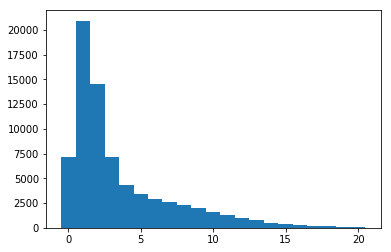

In [21]:
plt.hist(nTrks,bins=21,range=(-0.5,20.5))
plt.show()

In [26]:
trkGrade = myTree.array(b'jet_trk_ip3d_grade')

In [27]:
sd0 = myTree.array(b'jet_trk_ip3d_d0sig')

In [31]:
nTrks_grade = np.array([len(t) for jet in trkGrade for t in jet])

In [37]:
trk_vars  = ["jet_trk_ip3d_d0sig", "jet_trk_ip3d_z0sig",
            "jet_trk_pt", "jet_trk_eta", "jet_trk_theta", "jet_trk_phi",
            "jet_trk_orig",
            "jet_trk_nInnHits","jet_trk_nsharedBLHits","jet_trk_nsplitBLHits",
            "jet_trk_nNextToInnHits",
            "jet_trk_nPixHits","jet_trk_nPixHoles",
            "jet_trk_nsharedPixHits","jet_trk_nsplitPixHits",
            "jet_trk_nSCTHits","jet_trk_nSCTHoles",
            "jet_trk_nsharedSCTHits",
            ]
for v in trk_vars:
    var = myTree.array(v.encode())
    nTrks_var = np.array([len(t) for jet in var for t in jet])
    print(v,(nTrks_grade == nTrks_var).sum())

jet_trk_ip3d_d0sig 73805
jet_trk_ip3d_z0sig 73805
jet_trk_pt 73805
jet_trk_eta 73805
jet_trk_theta 73805
jet_trk_phi 73805
jet_trk_orig 73805
jet_trk_nInnHits 73805
jet_trk_nsharedBLHits 73805
jet_trk_nsplitBLHits 73805
jet_trk_nNextToInnHits 73805
jet_trk_nPixHits 73805
jet_trk_nPixHoles 73805
jet_trk_nsharedPixHits 73805
jet_trk_nsplitPixHits 73805
jet_trk_nSCTHits 73805
jet_trk_nSCTHoles 73805
jet_trk_nsharedSCTHits 73805


Ok, so I don't understand this shape mismatch error.

```
    Jet 580000 / 3000000
Traceback (most recent call last):
  File "root_to_np.py", line 1019, in <module>
    trkSelection=args.trkSelection)
  File "root_to_np.py", line 294, in getData
    output_trk_array[tvar].append( np.array(trk_arrays[tvar.encode()][ievt][ijet])[trk_mask][index_list] )
IndexError: boolean index did not match indexed array along dimension 0; dimension is 17 but corresponding boolean dimension is 7
```

In [36]:
nTrks_grade.shape

(73805,)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append("../..")
from root_to_np import *

In [ ]:
ievt, ijet = 0, 0

trk_mask = (np.array(sd0[ievt][ijet]) != -10)

index_list = get_sort_index( np.array(trk_arrays[sort_var][ievt][ijet])[trk_mask],
                                             sort_type='sd0_rev' )

In [ ]:
sd0

In [ ]:
trkGrade

In [ ]:
jet_vars = ["jet_LabDr_HadF","jet_pt_orig","jet_eta_orig","jet_phi_orig","jet_m",
            "jet_aliveAfterOR","jet_aliveAfterORmu",
            "jet_JVT","jet_pt","jet_eta"]
trk_vars  = ["jet_trk_ip3d_d0sig", "jet_trk_ip3d_z0sig",
            "jet_trk_ip3d_grade", "jet_trk_ip3d_llr",
            "jet_trk_pt", "jet_trk_eta", "jet_trk_theta", "jet_trk_phi",
            "jet_trk_orig",
            "jet_trk_nInnHits","jet_trk_nsharedBLHits","jet_trk_nsplitBLHits",
            "jet_trk_nNextToInnHits",
            "jet_trk_nPixHits","jet_trk_nPixHoles",
            "jet_trk_nsharedPixHits","jet_trk_nsplitPixHits",
            "jet_trk_nSCTHits","jet_trk_nSCTHoles",
            "jet_trk_nsharedSCTHits",
            ]
derived_trk_vars = ['jet_trk_ptfrac','jet_trk_dr']#,'jet_trk_prbP','jet_trk_pPerp']

In [ ]:
jet_arr = myTree.arrays(jet_vars)
trk_arr = myTree.arrays(trk_vars)

In [ ]:
jet_arr

In [ ]:
trk_arr

In [ ]:
output_jet_array = []
output_trk_array = {k:[] for k in trk_vars + derived_trk_vars}

In [ ]:
mus = myTree.array(b'avgmu')

## Event Loop
print('n_events',len(mus))

In [ ]:
#for ievt in range(n_events):
for ievt,mu in enumerate(mus):

#     if len(output_jet_array) % 10000 == 0:
#         print('    Jet {} / {}'.format(len(output_jet_array), int(nJets)))

    # Jet loop
    n_jets = len(jet_arr[b"jet_pt"][ievt])
    for ijet in range(n_jets):

        if not passJet(jet_arr, trk_arr, ievt, ijet, .2):
            continue

        # Append to a list for variables of the jet class
        # The encode() function just lets us go from a string to as bytes literal
        # https://stackoverflow.com/questions/45360480/is-there-a-formatted-byte-string-literal-in-python-3-6

        jetList = [jet_arr[jvar.encode()][ievt][ijet] \
                   for jvar in jet_vars if jvar != 'jet_bH_Lxy']
        
        break
    break

In [ ]:
ievt

In [ ]:
ijet

In [ ]:
for jvar in jet_vars: 
    print(jvar)
    if jvar != 'jet_bH_Lxy':
        print(jet_arr[jvar.encode()][ievt][ijet])

### VR track jets

**Goal:** Look at the VR track jet collection, and make sure that everything is there.

In [ ]:
fname = "../../../public/user.bdong.410470.ttbar_hdamp258p75_nonallhad.mc16d_newDerivation_noRetag_AktVR30Rmax4Rmin02Tr/user.bdong.16276417.AktVR30Rmax4Rmin02Tr._000002.root"
jetCollection = "VR30Rmax4Rmin02Track"

myTree = uproot.open(fname)["bTag_AntiKt{}Jets".format(jetCollection)]

In [ ]:
myTree.keys()

In [ ]:
jet_arr = myTree.arrays(jet_vars)
trk_arr = myTree.arrays(trk_vars)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
jet_arr[b'jet_pt_orig'].min().min()

In [ ]:
print("{} GeV".format(jet_arr[b'jet_pt_orig'].max().max()/1000))

In [ ]:
plt.hist(flatten(jet_arr[b'jet_pt_orig']))

In [ ]:
trk_mask

ok, I think the VR jet collection finisheed... let's take a look inside!

## Check the number of tracks in the VR Z' sample